In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/kaimorquecho/eds220-hwk2.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Average Salmon Catch by Region from 1878 - 1997'}, xlabel='Region', ylabel='Salmon Caught\n(1 unit = 1,000 fish)'>

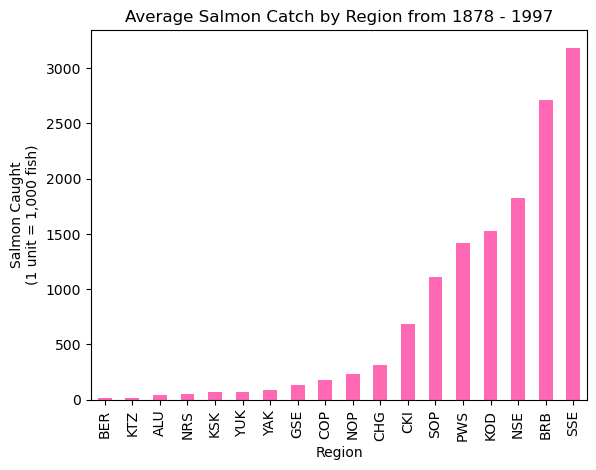

In [2]:
# FINAL CODE

# Import Pandas library
import pandas as pd 


# Load salmon catch dataset csv and store into DataFrame 'catch_data'
catch_data = pd.read_csv('data/salmon_data.csv') 


# Drop the 'notesRegCode' column from 'catch_data' DataFrame
catch_data.drop(columns='notesRegCode') 


# Find row that is preventing us from converting 'Catch' column to integer type
catch_data[catch_data['Catch']=="I"]


# Access and update problematic value
catch_data.loc[400, 'Catch']=int(1) # Update value from "I" to 1


# Convert 'Catch' column to type int64
catch_data['Catch'] = catch_data['Catch'].astype('int64') 


# Calculate average salmon catch per region
avg_region = catch_data.groupby('Region').mean('Catch') 


# Create a bar graph of average salmon catches by region
avg_region['Catch'].sort_values().plot(
    kind = 'bar',
    title = 'Average Salmon Catch by Region from 1878 - 1997',
    ylabel = 'Salmon Caught\n(1 unit = 1,000 fish)',
    color = 'hotpink')

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# a.

import pandas as pd # Import Pandas library

catch_data = pd.read_csv('data/salmon_data.csv') # Load salmon catch dataset 

catch_data.head() # View first rows of the dataset


,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# b.

# Check total NAs

catch_data.isna().sum()


Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64

In [5]:
# Minimum value in 'Year' column

min(catch_data['Year'])

1878

In [6]:
# Maximum value in 'Year' column

max(catch_data['Year'])

1997

In [7]:
catch_data.info() # View info about the dataset's data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        8540 non-null   object
 1   Year          8540 non-null   int64 
 2   notesRegCode  1415 non-null   object
 3   Species       8540 non-null   object
 4   Catch         8540 non-null   object
dtypes: int64(1), object(4)
memory usage: 333.7+ KB


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I wanted to know several details about the dataset: I wanted to check the shape (how many rows and columns) to understand what size dataset we are working with, if it contained concerning amounts of missing values, the timeframe, and what the data types for the columns were. 

From the exploration I learned that the data spans from 1878 to 1997 and it is comprised of 5 columns and 8540 rows. The values in the `notesRegCode` column are missing for most observations, which I assume is ebcause the observer had no notable comments to make. Most importantly, it stood out to me that the column `Catch` is an `object`, not an `int64` like the `Year` column is. I would expect `Catch` to be an `int64` because it contains the total commercial catches of the salmon species.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [8]:
# Use .unique() function to identify unique values in the `notesRegCode` column in the catch_data DataFrame

notes_unique = catch_data.notesRegCode.unique() 

print(notes_unique) # Output: a NumPy array of the unique values in the column

type(notes_unique) # Check the data type of the object to confirm it

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

numpy.ndarray

In [9]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [10]:
# Use the drop() method of the catch_data DataFrame to drop 'notesRegCode' column

catch_data = catch_data.drop(columns='notesRegCode')

catch_data.columns # Use 'columns' attribute to confirm column has been dropped

Index(['Region', 'Year', 'Species', 'Catch'], dtype='object')

In [11]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


In [12]:
catch_data.dtypes # View dtypes of all columns

Region     object
Year        int64
Species    object
Catch      object
dtype: object

No, each column does not have the expected data type. I would expect to see the `Catch` column to be of type `int64`, alike `Year` because it contains the total commercial catches of the salmon species. The other columns have the data type I would expect (`object`) since they contain descriptive information.

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [13]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [14]:
# Find row that is preventing us from converting 'Catch' column to integer type

catch_I = catch_data[catch_data['Catch']=="I"] 

print(catch_I)


    Region  Year  Species Catch
400    GSE  1955  Chinook     I


In [15]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [16]:
# Use .loc to access and update value. Method chaining can create ambiguity and update a copy instead of a view

catch_data.loc[400, 'Catch']=int(1) # Update value from "I" to 1

catch_1 = catch_data.loc[[400]] # Access updated row and store in catch_1 variable

# Print catch_1
catch_1

,Region,Year,Species,Catch
400,GSE,1955,Chinook,1


<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [17]:
# Convert 'Catch' column 

catch_data['Catch'] = catch_data['Catch'].astype('int64') # 'Catch' column of type int64

catch_column_type = catch_data['Catch'].dtype # Confirm new data type
catch_column_type

dtype('int64')

In [18]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [19]:
# Calculate average salmon catch per region

avg_region = catch_data.groupby('Region').mean('Catch') # Group by region, and calculate the mean of 'Catch' column 
avg_region

,Year,Catch
Region,,
ALU,1954.0,40.383908
BER,1946.5,16.372549
BRB,1940.5,2709.796491
CHG,1942.5,315.487273
CKI,1945.0,683.571429
COP,1950.5,179.223404
GSE,1918.5,133.841463
KOD,1939.5,1528.350000
KSK,1955.0,67.642353


In [20]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Average Salmon Catch by Region from 1878 - 1997'}, xlabel='Region', ylabel='Salmon Caught\n(1 unit = 1,000 fish)'>

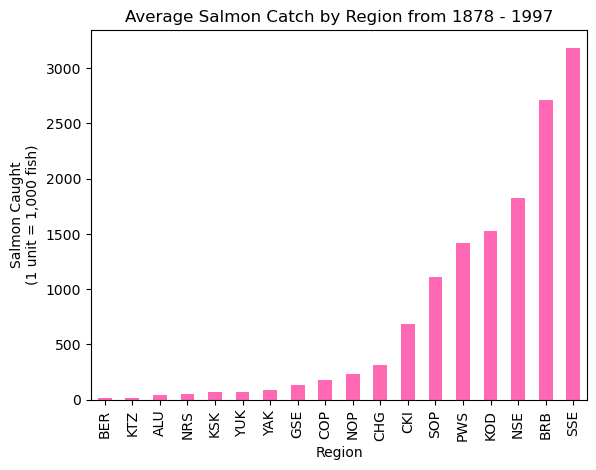

In [21]:
# Create a bar graph of average salmon catches by region

avg_region['Catch'].sort_values().plot( # Use 'avg_region' DataFrame and sort values 
    kind = 'bar',
    title = 'Average Salmon Catch by Region from 1878 - 1997', # Set descriptive title
    ylabel = 'Salmon Caught\n(1 unit = 1,000 fish)', # Update y-axis label to note salmon catch units
    color = 'hotpink')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

The plot I created provides some key takeaways. The Southern Southeast Alaska region is without a doubt the most productive management area for salmon catch. In comparison, the Bering River Subarea Copper River Subarea is the least productive of the regions (or subareas, to be more precise). The Bristol, Southern Southeast, and Northern Southeast management areas alone are responsible for more salmon catches then the rest of the regions combined. 


<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [22]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q5 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!